In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from astropy.cosmology import FlatLambdaCDM

%matplotlib ipympl

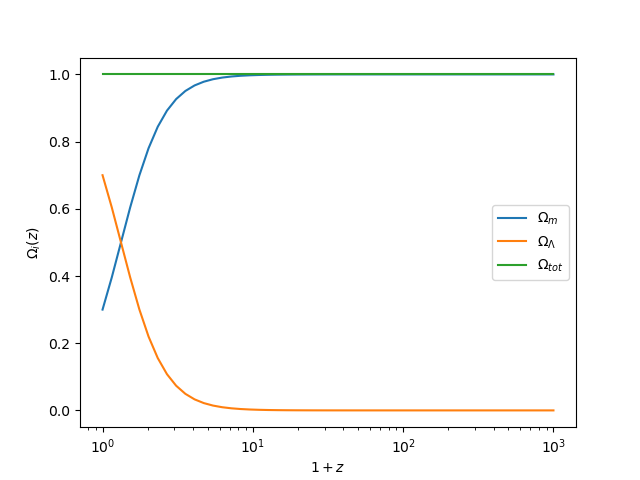

interactive(children=(FloatSlider(value=0.3, description='$\\Omega_m^0$', max=1.0, step=0.01), Output()), _dom…

In [2]:
a = np.logspace(0, -3)
z = 1/a - 1

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
OmegaM = cosmo.Om(z)
OmegaL = cosmo.Ode(z)
OmegaT = cosmo.Otot(z)
pm, = plt.plot(z+1, OmegaM, label="$\Omega_m$")
pl, = plt.plot(z+1, OmegaL, label="$\Omega_\Lambda$")
plt.plot(z+1, OmegaT, label="$\Omega_{tot}$")
plt.xscale("log")
plt.xlabel("$1+z$")
plt.ylabel("$\Omega_i(z)$")
plt.legend()
plt.show()

def update(om = 0.3):
    cosmo = FlatLambdaCDM(H0=70, Om0=om)
    pm.set_ydata(cosmo.Om(z))
    pl.set_ydata(cosmo.Ode(z))
    fig.canvas.draw_idle()

_ = interact(update, om=FloatSlider(min=0, max=1, step=0.01, value=0.3, description=r"$\Omega_m^0$"))

interactive(children=(FloatSlider(value=0.3, description='$\\Omega_m^0$', max=1.0, step=0.01), Output()), _dom…

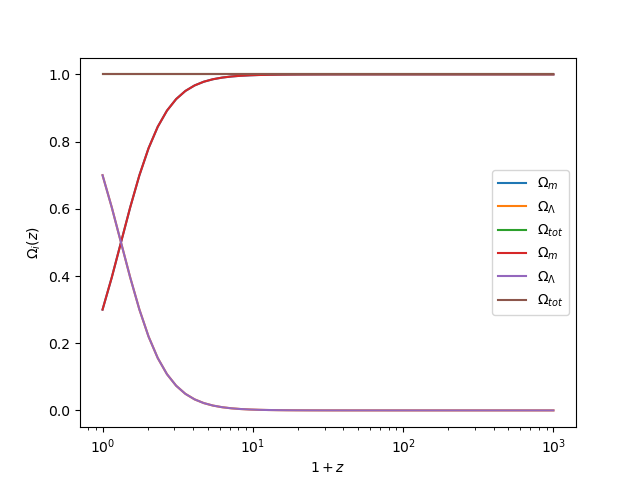

In [3]:
#| label: omegas

#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

@interact(om=FloatSlider(min=0, max=1, step=0.01, value=0.3, description=r"$\Omega_m^0$"))
def plot_omegas(om):
    a = np.logspace(0, -3)
    z = 1/a - 1

    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    # fig = plt.figure()
    # ax = fig.add_subplot(1, 1, 1)
    OmegaM = cosmo.Om(z)
    OmegaL = cosmo.Ode(z)
    OmegaT = cosmo.Otot(z)
    plt.plot(z+1, OmegaM, label="$\Omega_m$")
    plt.plot(z+1, OmegaL, label="$\Omega_\Lambda$")
    plt.plot(z+1, OmegaT, label="$\Omega_{tot}$")
    plt.xscale("log")
    plt.xlabel("$1+z$")
    plt.ylabel("$\Omega_i(z)$")
    plt.legend()
    plt.show()

plot_omegas(0.3)

I try some embbeded plots ({eval}`fig`) here.

In [5]:
#| label: om-slider
slider = FloatSlider(min=0, max=1, step=0.01, value=0.3, description=r"$\Omega_m^0$")
slider

FloatSlider(value=0.3, description='$\\Omega_m^0$', max=1.0, step=0.01)

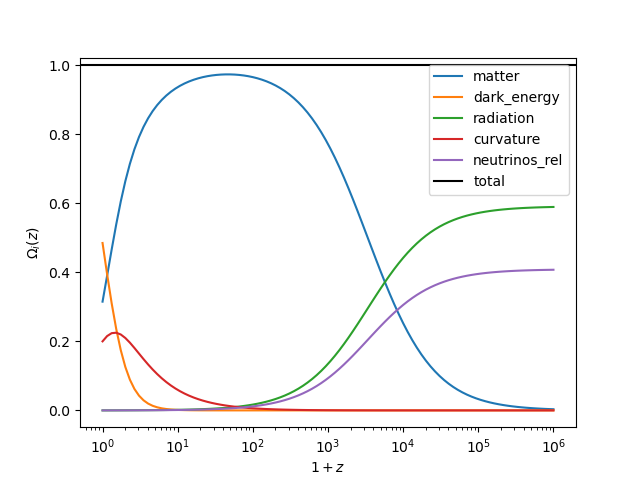

In [11]:
import pyccl as ccl

cosmo = ccl.Cosmology(Omega_k=0.2, Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
zs = np.logspace(0, 6, 100) - 1
rho_crit = ccl.rho_x(cosmo, 1/(1+zs), "critical")
rho_c = ccl.rho_x(cosmo, 1/(1+zs), "matter")

fig = plt.figure()
for specie in ["matter", "dark_energy", "radiation", "curvature", "neutrinos_rel"]:
    plt.plot(1+zs, ccl.rho_x(cosmo, 1/(1+zs), specie)/rho_crit, label=specie)
plt.axhline(1, color="k",  label="total")
plt.xscale("log")
plt.xlabel("$1+z$")
plt.ylabel("$\Omega_i(z)$")
plt.legend()
plt.show()